# EUC sensitivity MEKE_VISCOSITY_COEFF_(KU,AU)

Gustavo Marques (gmarques@ucar.edu)

Last update: 04/06/2020

### Experiments 
* G50: G47 + MEKE_VISCOSITY_COEFF_KU = 0.1
* G51: G48 + MEKE_VISCOSITY_COEFF_KU = 0.1
* G52: G49 + MEKE_VISCOSITY_COEFF_KU = 0.1 
* G53: G42 + MEKE_VISCOSITY_COEFF_AU = 5.0
* G54: G42 + MEKE_VISCOSITY_COEFF_AU = 2.5


### Time averages:
Run for 4 years, time averages over last 2 years

# Globally-averaged ocean properties

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
path = '/glade/scratch/gmarques/'
exps = ['g.c2b6.GJRA.TL319_t061.long_JRA_mct.050',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.051',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.052',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.053',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.054']
labels = ['G50', 'G51', 'G52', 'G53', 'G54']

def get_data(full_path, variables):
  def preprocess(ds):
    ''' Return the dataset with variable'''
    return ds[variables]
  ds = xr.open_mfdataset(full_path, data_vars='minimal', \
                         coords='minimal', compat='override', preprocess=preprocess)
  return ds

import seaborn, matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [5]:
# load pre-difined masks
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import ztplot, polarplot, xyplot, xycompare
import cartopy.crs as ccrs
import cartopy.feature
grd = MOM6grid('/glade/scratch/gmarques/'+exps[0]+'/run/'+exps[0]+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

MOM6 grid successfully loaded... 

11.16427964664149 64.78854837178643 [391, 434]


/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.050/run/*mom6.hm_*.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.051/run/*mom6.hm_*.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.052/run/*mom6.hm_*.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.053/run/*mom6.hm_*.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.054/run/*mom6.hm_*.nc


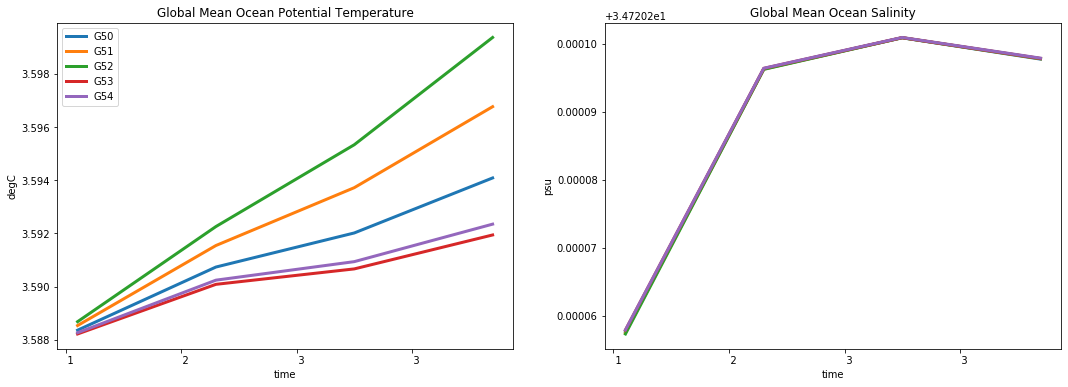

In [6]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
varilineles = ['thetaoga', 'soga']
for i in range(len(exps)):
  tmp = path+exps[i]+'/run/*mom6.hm_*.nc'
  print(tmp)
  ds = get_data(tmp,variables)
  ds1 = ds.sel(time=slice('0001-01-01', '0059-01-01'))
  ds1['thetaoga'].plot(ax=ax[0], label=labels[i], lw=3)
  ds1['soga'].plot(ax=ax[1], lw=3)

ax[0].set_title(ds1.thetaoga.attrs['long_name']); ax[0].set_ylabel(ds1.thetaoga.attrs['units'])
ax[1].set_title(ds1.soga.attrs['long_name']); ax[1].set_ylabel(ds1.soga.attrs['units']); ax[0].legend()

# Equatorial plots

## Temperature

<center> <font size="4">Equatorial_Global_temperature</font></center>
<table><tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.050_Equatorial_Global_temperature.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.051_Equatorial_Global_temperature.png'></td>
    </tr>
    <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.052_Equatorial_Global_temperature.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.053_Equatorial_Global_temperature.png'></td>
    </tr>    
        <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.054_Equatorial_Global_temperature.png'></td>
    </tr> 
</table>

## Salinity

<center> <font size="4">Equatorial_Global_salinity</font></center>
<table><tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.050_Equatorial_Global_salinity.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.051_Equatorial_Global_salinity.png'></td>
    </tr>
    <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.052_Equatorial_Global_salinity.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.053_Equatorial_Global_salinity.png'></td>
    </tr>    
        <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.054_Equatorial_Global_salinity.png'></td>
    </tr> 
</table>

## Undercurrent

<center> <font size="4">Equatorial_Pacific_uo</font></center>
<table>
    <tr>
    <td><center><font size="4">G50</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.050_Equatorial_Pacific_uo.png'></td></tr>
    <tr>
             <td><center><font size="4">G51</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.051_Equatorial_Pacific_uo.png'></td></tr> 
    <tr><td><center><font size="4">G52</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.052_Equatorial_Pacific_uo.png'></td></tr>
    <tr><td><center><font size="4">G53</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.053_Equatorial_Pacific_uo.png'></td></tr>
      <tr><td><center><font size="4">G54</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.054_Equatorial_Pacific_uo.png'></td></tr>
  </table>

# Transport time series

In [7]:
i=0
ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_section_transports.nc')
ds.sections

<xarray.DataArray 'sections' (sections: 18)>
array(['Agulhas', 'Bab al mandeb Strait', 'Bering Strait', 'Barents Opening',
       'Davis Strait', 'Denmark Strait', 'Drake Passage', 'English Channel',
       'Florida-Bahamas', 'Fram Strait', 'Gibraltar Strait', 'Hormuz Strait',
       'Iceland-Norway', 'Indonesian Throughflow', 'Mozambique Channel',
       'Pacific Equatorial Undercurrent', 'Taiwan-Luzon Strait',
       'Windward Passage'], dtype=object)
Coordinates:
  * sections  (sections) object 'Agulhas' ... 'Windward Passage'

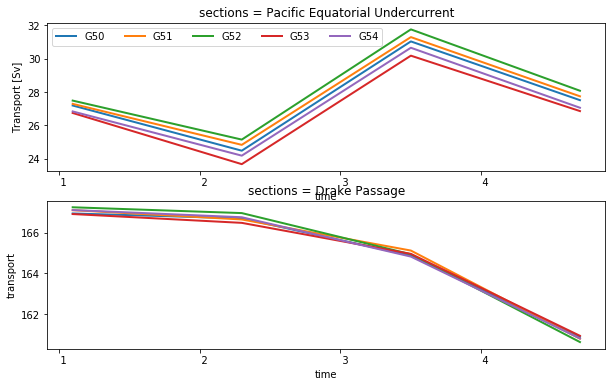

In [8]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_section_transports.nc')
  ds.transport.sel(sections='Pacific Equatorial Undercurrent').plot(ax=ax[0], label=labels[i], lw=2)
  ds.transport.sel(sections='Drake Passage').plot(ax=ax[1], label=labels[i], lw=2)

ax[0].set_ylabel('Transport [Sv]'); ax[0].legend(ncol=6)

# Mixing coefficients

In [9]:
def get_data_sf(full_path):
  ds = xr.open_dataset(full_path)
  return ds
variables = ['diftrblo', 'difmxylo' ,'difmxybo', 'diftrelo']

## GM (KHTH)

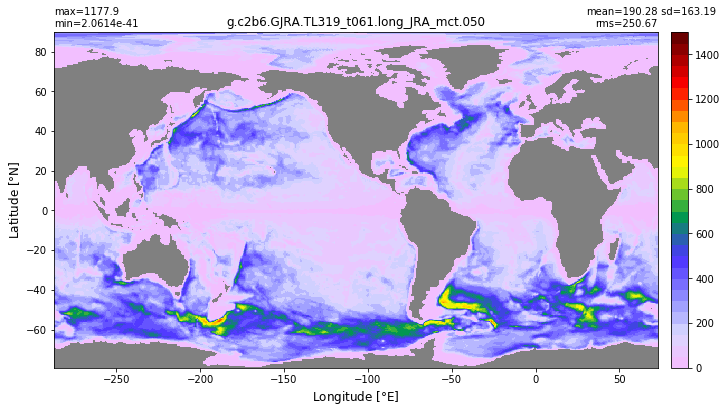

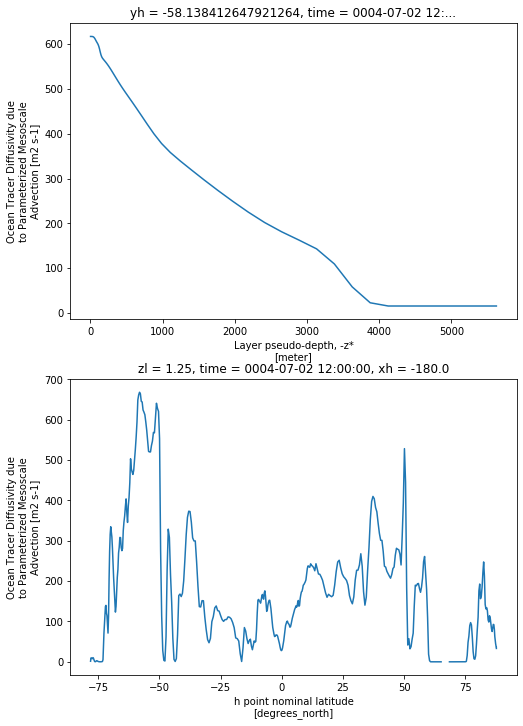

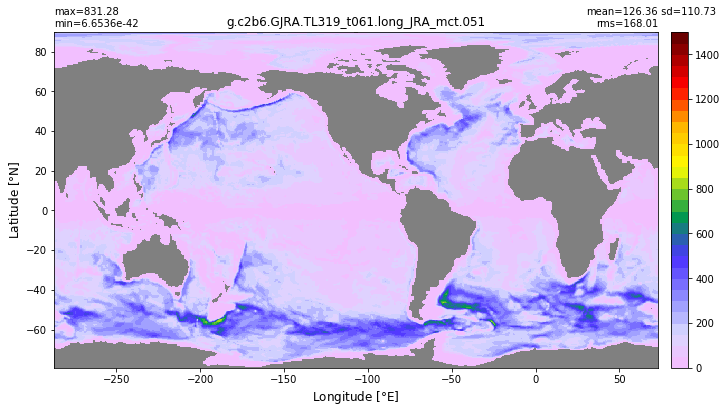

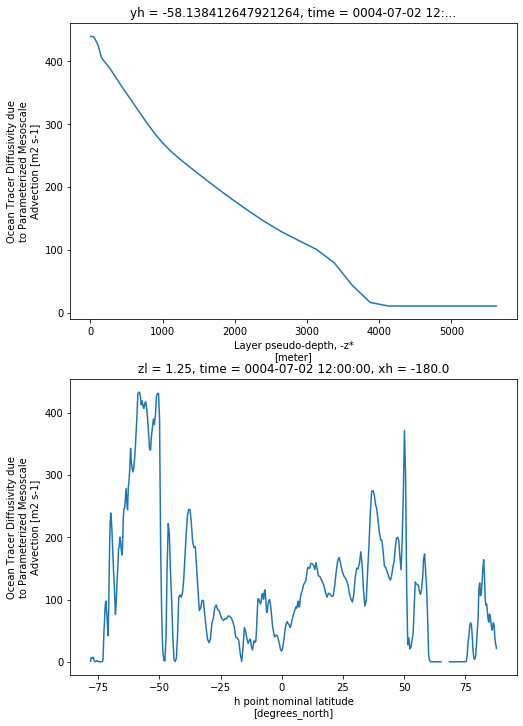

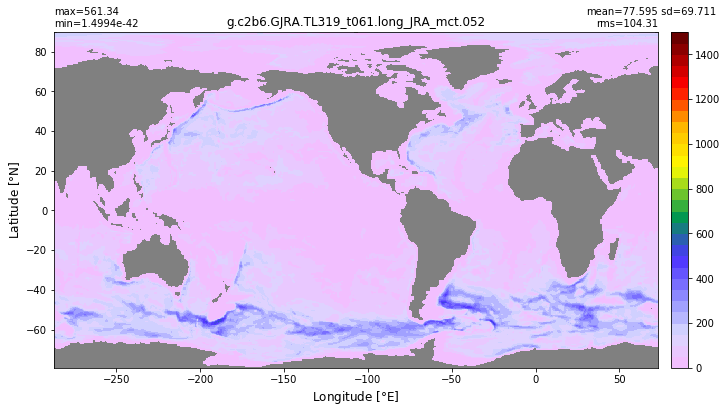

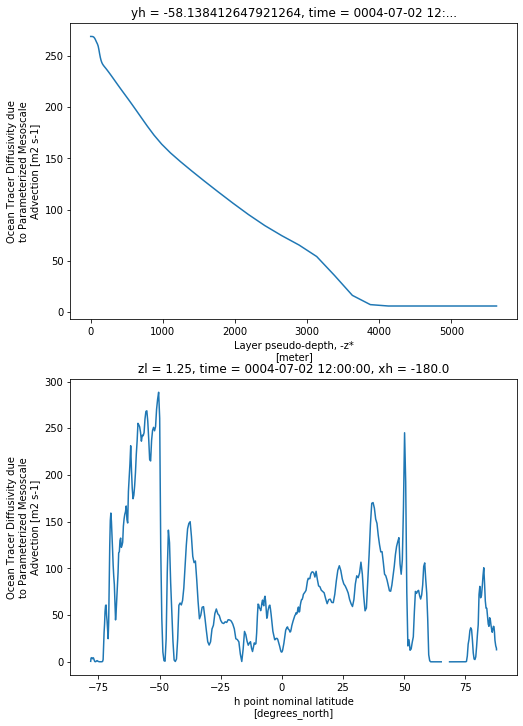

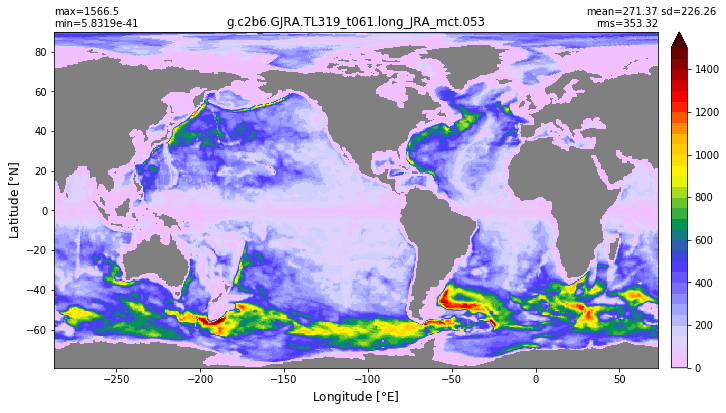

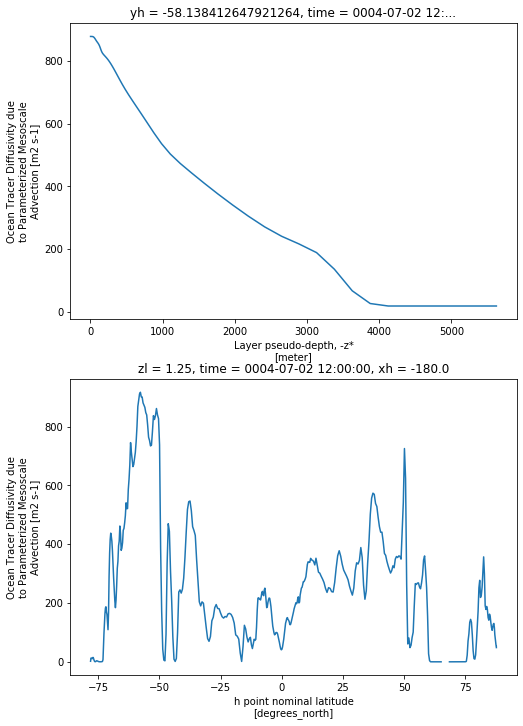

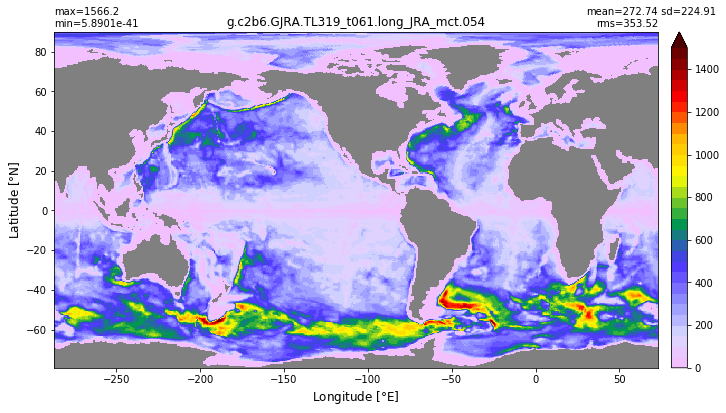

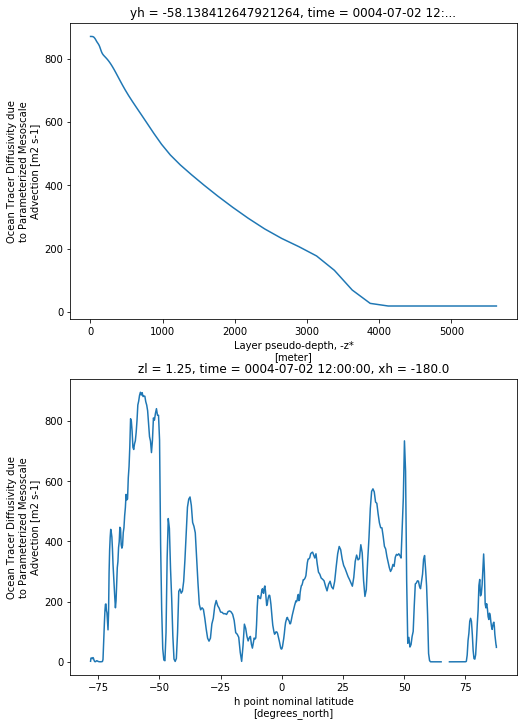

In [10]:
# GM coefficient
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
# section at -180E
i1 = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0004.nc')
  xyplot(np.ma.masked_invalid(ds[variables[0]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, 
         clim=(0,1500), title=str(exps[exp]))
  f, ax = plt.subplots(2,1, figsize=(8,12))
  ds[variables[0]][0,:,j,i].plot(ax=ax[0])
  ds[variables[0]][0,0,:,i1].plot(ax=ax[1])


## Laplacian viscosity

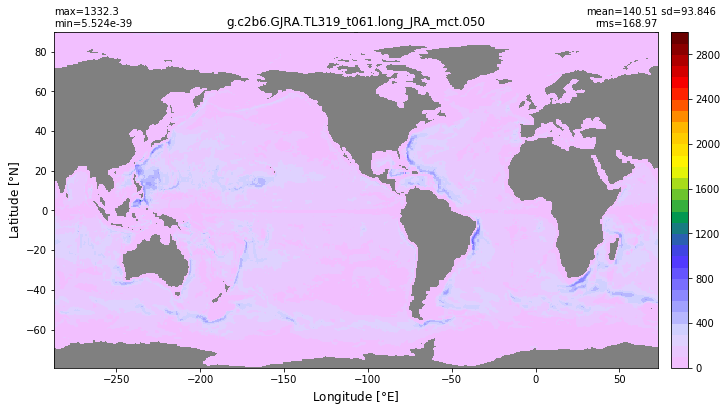

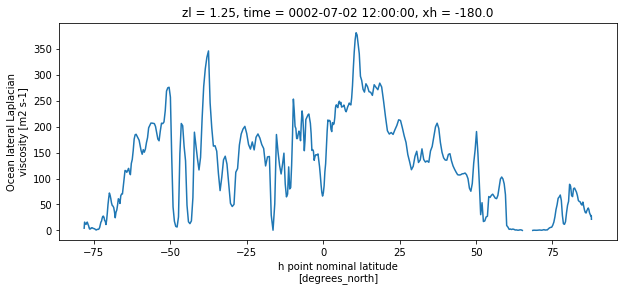

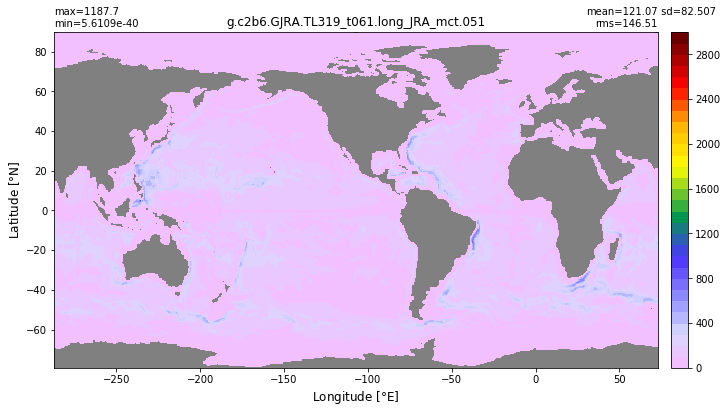

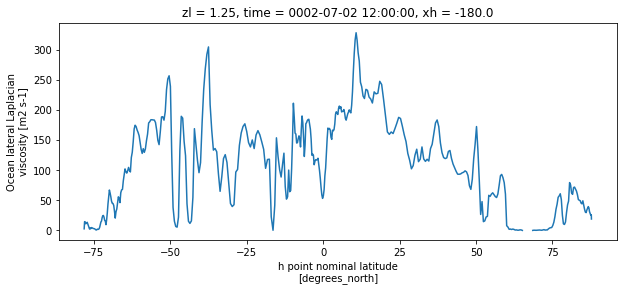

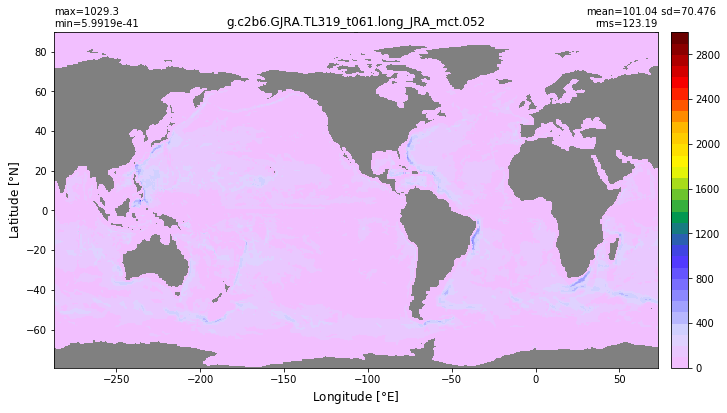

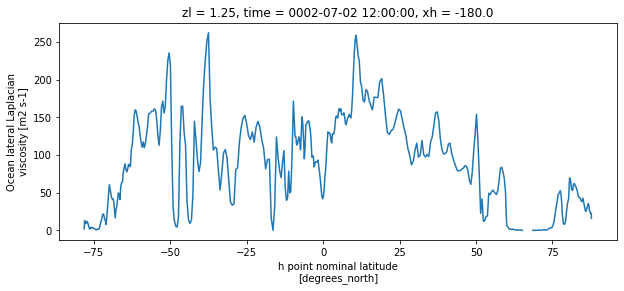

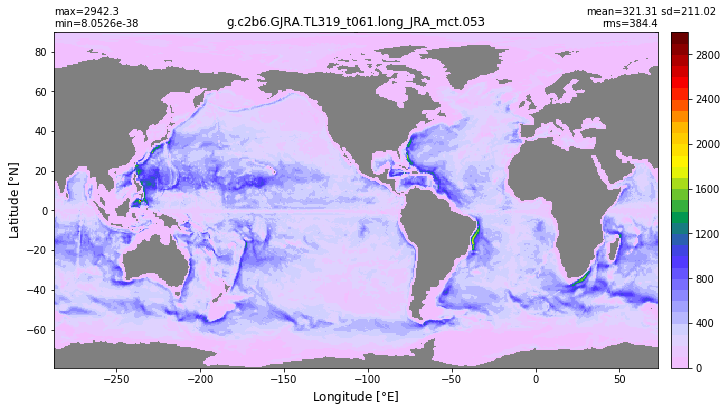

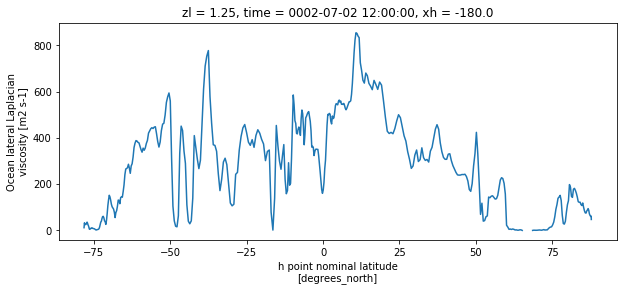

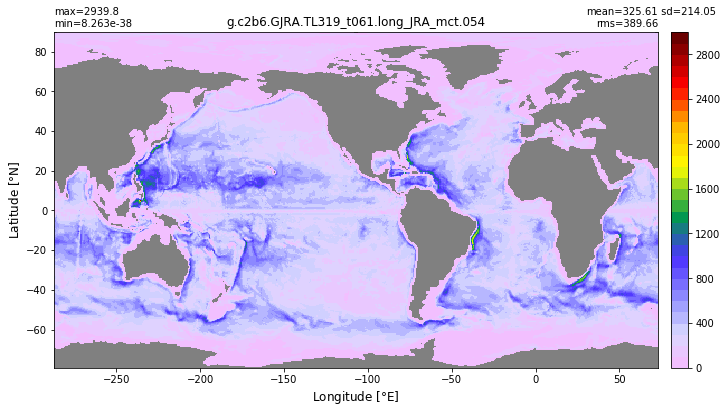

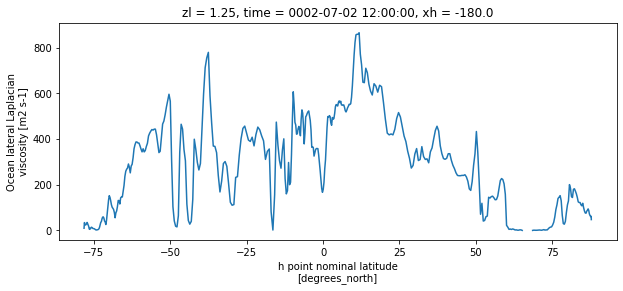

In [11]:
# Laplacian visc
# section at -180E
i = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002.nc')
  xyplot(np.ma.masked_invalid(ds[variables[1]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(0,3000), title=str(exps[exp]))
  f, ax = plt.subplots(1,1, figsize=(10,4))
  ds[variables[1]][0,0,:,i].plot(ax=ax)
  #ax.set_title(''); ax[1].set_title('');

## Biharmonic viscosity

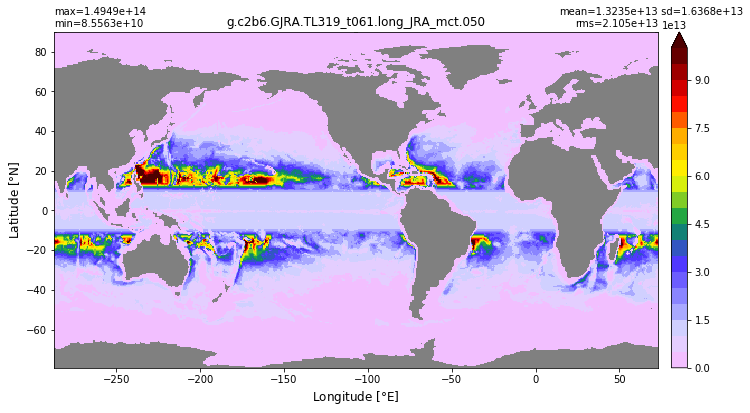

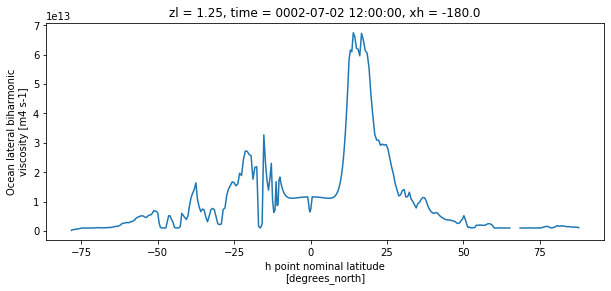

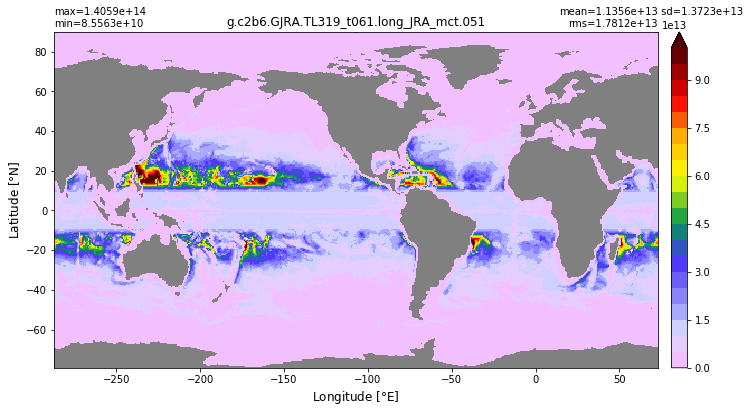

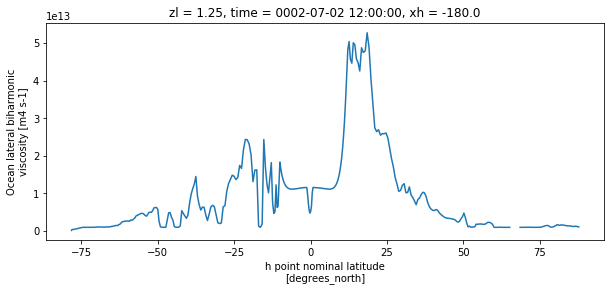

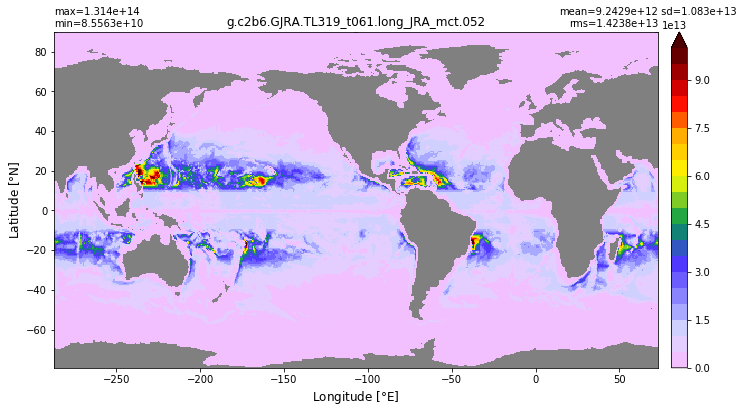

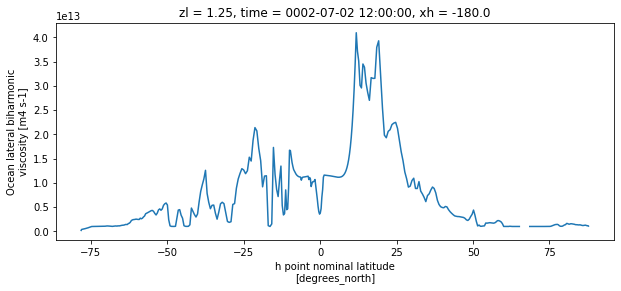

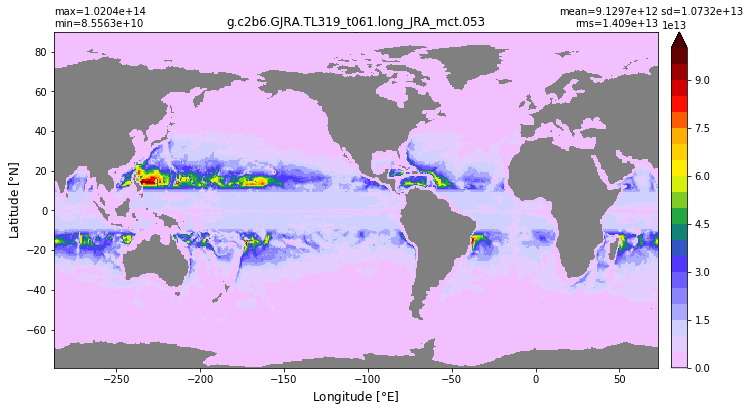

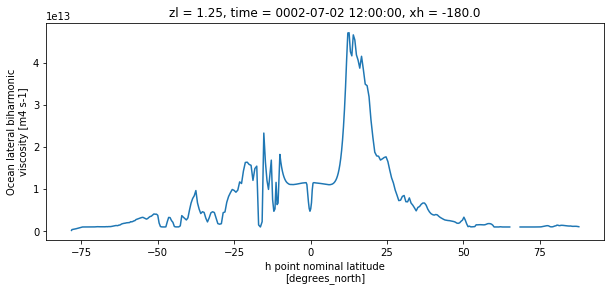

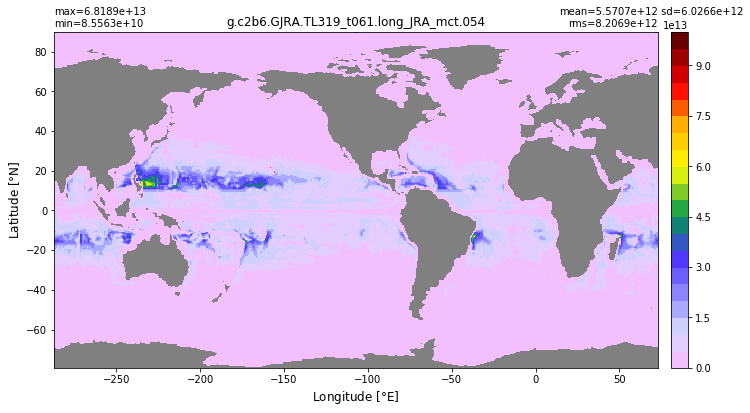

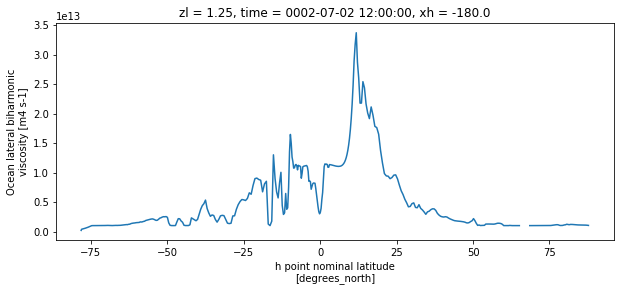

In [12]:
# Biharmonic
# section at -180E
i = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002.nc')
  xyplot(np.ma.masked_invalid(ds[variables[2]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(1.0e10,1.0e14), title=str(exps[exp]))
  f, ax = plt.subplots(1,1, figsize=(10,4))
  ds[variables[2]][0,0,:,i].plot(ax=ax)
    

## Redi (KHTR)

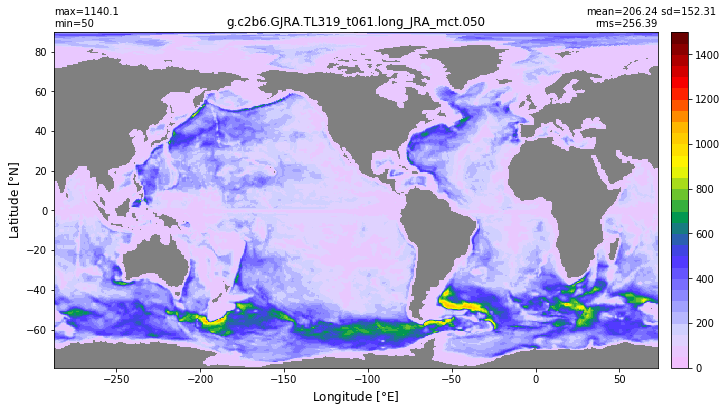

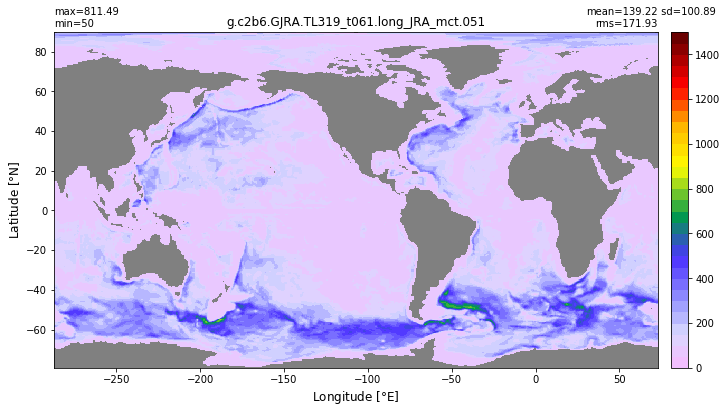

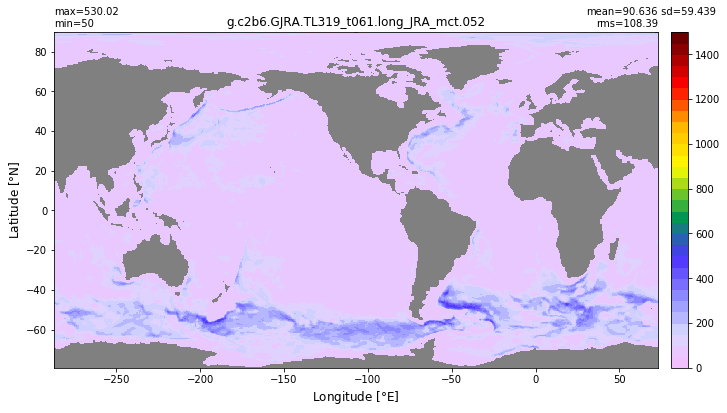

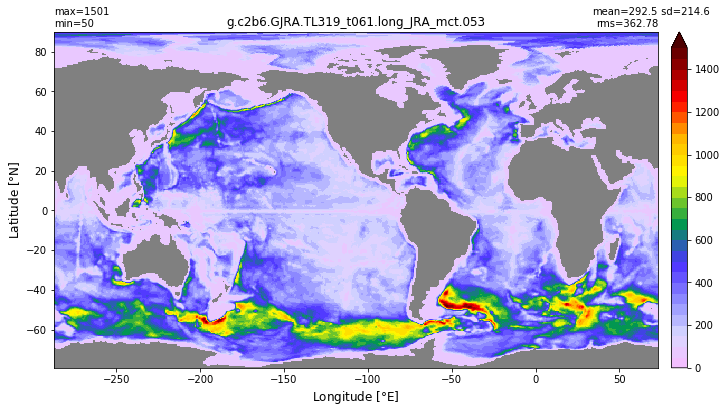

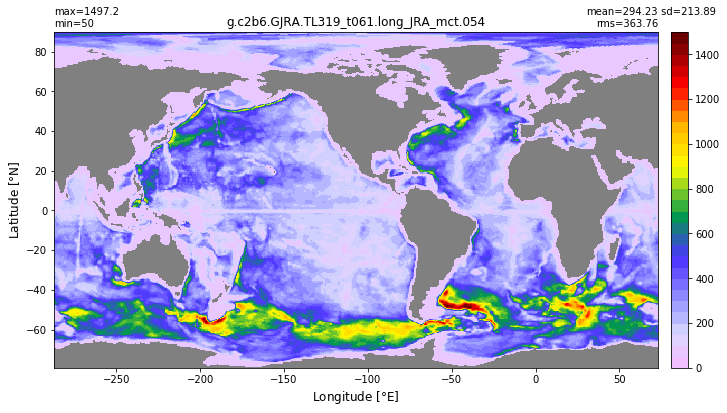

In [13]:
# KHTR (Redi)
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002.nc')
  xyplot(np.ma.masked_invalid(ds[variables[3]][0,:].values), grd.geolon, grd.geolat, clim=(0, 1500), area=grd.area_t, title=str(exps[exp]))